In [3]:
import pandas as pd
import numpy as np
import json

In [7]:
!pip3 install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=55eb4cfc61abd6982eaadb633a43298ed46fa1e70b0a937e40cb9d27afe33aa0
  Stored in directory: /home/ec2-user/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [31]:
df = pd.read_csv('data/clean_hike_data.csv', index_col=0)

In [32]:
df.head().T

,0,1,2,3,4
HikeName,Dirty Face Lookout and Peak,Perry Creek,Hannegan Pass and Peak,Eruption Trail,Copper Ridge Loop
Region,Central Cascades,North Cascades,North Cascades,South Cascades,North Cascades
Subregion,Central Cascades,North Cascades,North Cascades,South Cascades,North Cascades
TotalDistance,"9.0 miles, roundtrip","10.5 miles, roundtrip","10.4 miles, roundtrip","0.5 miles, roundtrip","34.0 miles, roundtrip"
ElevationGain,3950,3400,3100,25,8600
MaximumElevation,5989,5250,6200,4200,6260
Description,Dirty Face Lookout is one of the earliest high...,"Perry Creek proves you can have it all, and yo...",Begin hiking from the parking area at the end ...,"A barrier-free, paved hike of less than one mi...",Experience the variety offered by the North Ca...
PassNeeded,Northwest Forest Pass,Northwest Forest Pass,Northwest Forest Pass,National Monument Fee,Northwest Forest Pass
LatLong,"47.8379,-120.7976","48.0541,-121.4907","48.9101,-121.5927","46.2765,-122.2165","48.9102,-121.5917"
TimeFromSeattle,125.6,93.0833,163.533,161.75,163.8


In [35]:
df[['ElevationGain',
       'MaximumElevation', 
       'TimeFromSeattle', 'Coast', 'DogsAllowed', 'EstablishedCampsites',
       'FallFoliage', 'GoodForKids', 'Lakes', 'MountainViews', 'OldGrowth',
       'RidgesPasses', 'Rivers', 'Summits', 'Waterfalls', 'WildflowersMeadows',
       'Wildlife', 'countTripReports',
       'distance']]

,ElevationGain,MaximumElevation,TimeFromSeattle,Coast,DogsAllowed,EstablishedCampsites,FallFoliage,GoodForKids,Lakes,MountainViews,OldGrowth,RidgesPasses,Rivers,Summits,Waterfalls,WildflowersMeadows,Wildlife,countTripReports,distance
0,3950,5989,125.600000,0,1,0,0,0,0,0,0,0,0,1,0,1,0,217,9.0
1,3400,5250,93.083333,0,1,0,1,0,0,1,1,1,0,1,1,1,0,617,10.5
2,3100,6200,163.533333,0,1,1,0,0,0,1,0,1,0,1,0,0,1,512,10.4
3,25,4200,161.750000,0,0,0,0,1,0,1,0,0,0,0,0,1,0,18,0.5
4,8600,6260,163.800000,0,0,1,0,0,1,1,0,1,1,1,0,0,1,122,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,None,None,163.533333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0.5
2943,250,None,274.216667,0,1,0,0,0,0,1,0,0,0,0,0,0,0,7,2.0
2945,1300,1570,197.866667,0,1,0,1,1,0,1,0,0,0,0,0,1,1,3,6.0
2950,500,1200,200.916667,0,1,0,0,0,0,0,0,0,0,0,0,1,1,13,1.8


## Using Feature Importance from Gradient Boosting to get weights

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df.replace(to_replace=["None"], value=np.nan, inplace=True)
df = df.dropna()
X = df[['ElevationGain',
       'TimeFromSeattle', 'Coast', 'DogsAllowed', 'EstablishedCampsites',
       'FallFoliage', 'GoodForKids', 'Lakes', 'MountainViews', 'OldGrowth',
       'RidgesPasses', 'Rivers', 'Summits', 'Waterfalls', 'WildflowersMeadows',
       'Wildlife', 'countTripReports',
       'distance']]
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gb = GradientBoostingRegressor(min_samples_leaf=3, random_state=0).fit(X_train, y_train)
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, gb.predict(X_test)))))

RMSE: 1.1522251385382423


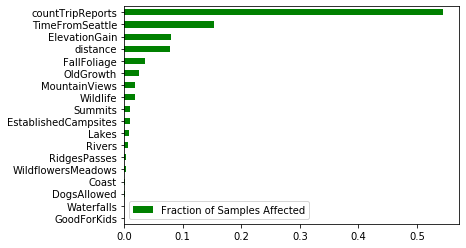

In [47]:
feat_imp = gb.feature_importances_
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gb.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', color='green')

In [48]:
weights = dict(zip(X.columns, gb.feature_importances_))

In [49]:
weights

{'ElevationGain': 0.08088926374096386,
 'TimeFromSeattle': 0.15267880383054017,
 'Coast': 0.002390998999926175,
 'DogsAllowed': 0.0012553190403816,
 'EstablishedCampsites': 0.01015433268815869,
 'FallFoliage': 0.03621965292388979,
 'GoodForKids': 0.0,
 'Lakes': 0.008223032157539938,
 'MountainViews': 0.018512043506946005,
 'OldGrowth': 0.025258605813801176,
 'RidgesPasses': 0.004037668934122245,
 'Rivers': 0.007060788267084692,
 'Summits': 0.010542753598486509,
 'Waterfalls': 0.00019599592911147094,
 'WildflowersMeadows': 0.002537626643713041,
 'Wildlife': 0.017885814526906914,
 'countTripReports': 0.5443232877124791,
 'distance': 0.07783401168594875}

In [50]:
def prettyPrint(scores):
    for score in scores:
        print 'Hike Name: ', df.ix[score]['hike_name']
        print 'Miles: ', df.ix[score]['total_dist']
        print 'EG: ', df.ix[score]['elevation gain']

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Hike Name: ', df.ix[score]['hike_name'])? (<ipython-input-50-04af11a931ac>, line 3)

In [51]:
# writes weights for use in model
with open('data/weights.json', 'w') as weight_fp:
    json.dump(weights, weight_fp)